Build a regression model.

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
BIKE_FS_YELP_DF = pd.read_csv("../data/BIKE_FS_YELP_DF.csv")
BIKE_FS_YELP_DF.head()

,Name,Latitude,Longitude,Number of Free Bikes,Rest/Bar Rating(FS),Average Distance_Bar_x,Average Distance_Gym_x,Rest/Bar Rating(YELP),Average Distance_Bar_y,Average Distance_Gym_y
0,Parc Anet-Gomin,46.786588,-71.258231,5,0 8.1\n1 NaN\n2 8.5\n3 7.0\n4 7...,711.3,777.125000,0 4.5\n1 4.5\n2 4.5\n3 4.0\n4 ...,877.117260,0.000000
1,Sheppard / William,46.784041,-71.249391,4,0 7.8\n1 8.5\n2 6.6\n3 7.7\n4 7...,355.2,142.000000,0 4.5\n1 4.5\n2 4.5\n3 4.0\n4 ...,334.688704,0.000000
2,ExpoCité - Grand Marché,46.829433,-71.244066,4,0 8.1\n1 NaN\n2 NaN\n3 NaN\n4 6...,302.2,701.857143,0 5.0\n1 4.5\n2 5.0\n3 5.0\n4 ...,775.248808,960.440552
3,Lavigueur / Sainte-Geneviève,46.812403,-71.220411,7,0 9.1\n1 8.6\n2 8.5\n3 8.9\n4 9...,376.9,568.800000,0 4.0\n1 4.5\n2 5.0\n3 4.0\n4 ...,526.095304,596.684360
4,ExpoCité - Place Jean-Béliveau,46.826553,-71.245978,4,0 8.1\n1 9.1\n2 NaN\n3 NaN\n4 N...,395.1,608.500000,0 5.0\n1 5.0\n2 4.5\n3 4.0\n4 ...,772.152088,0.000000


In [31]:
#creating variables for the regression
y = BIKE_FS_YELP_DF['Number of Free Bikes']
x = BIKE_FS_YELP_DF[['Average Distance_Bar_x', 'Average Distance_Gym_x', 'Average Distance_Bar_y', 'Average Distance_Gym_y']]

x = sm.add_constant(x) #adds a constant/intercept for the regression

#create the model
model = sm.OLS(y, x)
regression = model.fit()

Provide model output and an interpretation of the results. 

In [32]:
print(regression.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Free Bikes   R-squared:                       0.075
Model:                              OLS   Adj. R-squared:                  0.021
Method:                   Least Squares   F-statistic:                     1.391
Date:                  Mon, 23 Oct 2023   Prob (F-statistic):              0.246
Time:                          12:27:32   Log-Likelihood:                -202.15
No. Observations:                    74   AIC:                             414.3
Df Residuals:                        69   BIC:                             425.8
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [47]:
# drop the columns with high p values to see if they increase fit of model
# i.e. distance from bars and yelp results for average gym distance
x = BIKE_FS_YELP_DF[['Average Distance_Gym_x']]

x = sm.add_constant(x) #adds a constant/intercept for the regression

#create the model
model = sm.OLS(y, x)
regression1 = model.fit()

In [48]:
print(regression1.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Free Bikes   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.033
Method:                   Least Squares   F-statistic:                     3.491
Date:                  Mon, 23 Oct 2023   Prob (F-statistic):             0.0658
Time:                          13:59:19   Log-Likelihood:                -203.27
No. Observations:                    74   AIC:                             410.5
Df Residuals:                        72   BIC:                             415.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

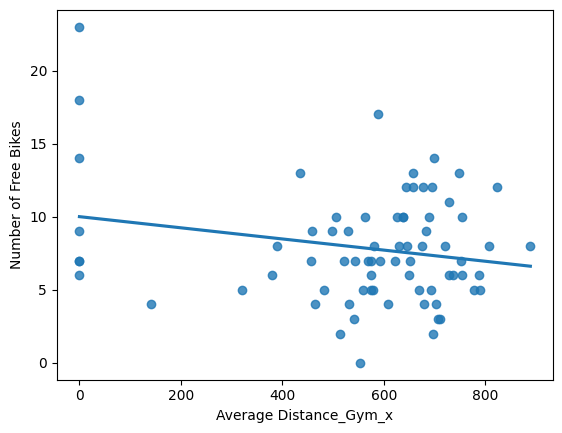

In [45]:
sns.regplot(x = BIKE_FS_YELP_DF['Average Distance_Gym_x'], y = BIKE_FS_YELP_DF['Number of Free Bikes'], ci=None)
plt.savefig('../images/RegLOBF.png')


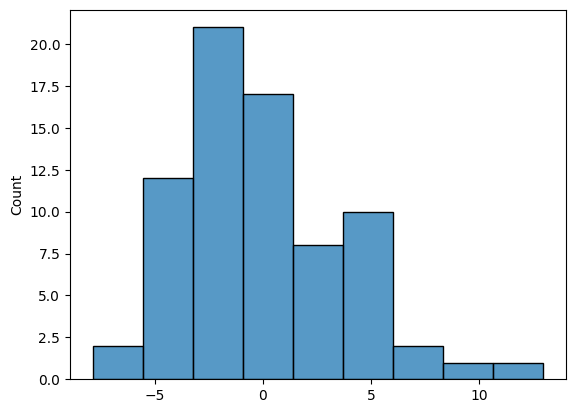

In [46]:
residuals = regression1.resid

sns.histplot(residuals)
plt.savefig('../images/residualDist.png')

plt.show()

In [28]:
#Try another regression but without stations without a local gym
df_noZeros = BIKE_FS_YELP_DF[BIKE_FS_YELP_DF['Average Distance_Gym_x'] !=0]

#creating variables for the regression
y = df_noZeros['Number of Free Bikes']
x = df_noZeros[['Average Distance_Gym_x']]

x = sm.add_constant(x) #adds a constant/intercept for the regression

#create the model
model = sm.OLS(y, x)
regression2 = model.fit()

print(regression2.summary()) #results in lower accuracy

                             OLS Regression Results                             
Dep. Variable:     Number of Free Bikes   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.012
Method:                   Least Squares   F-statistic:                     1.768
Date:                  Mon, 23 Oct 2023   Prob (F-statistic):              0.188
Time:                          12:23:18   Log-Likelihood:                -173.55
No. Observations:                    67   AIC:                             351.1
Df Residuals:                        65   BIC:                             355.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

# Stretch

How can you turn the regression model into a classification model?